## Client Segmentation

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('Avm_Musterileri.csv')
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


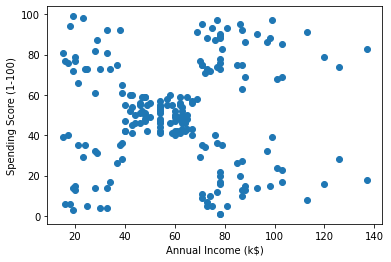

In [2]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [4]:
# Sütun İsmi Değiştirme

df.rename(columns={'Annual Income (k$)': 'income'}, inplace=True)
df.rename(columns={'Spending Score (1-100)': 'score'}, inplace=True)

### Verileri Normalize Etme

In [5]:
scaler = MinMaxScaler()

scaler.fit(df[['income']])
df['income'] = scaler.transform(df[['income']])

scaler.fit(df[['score']])
df['score'] = scaler.transform(df[['score']])

df.head()

,CustomerID,income,score
0,1,0.000000,0.387755
1,2,0.000000,0.816327
2,3,0.008197,0.051020
3,4,0.008197,0.775510
4,5,0.016393,0.397959


In [6]:
df.tail()

,CustomerID,income,score
195,196,0.860656,0.795918
196,197,0.909836,0.275510
197,198,0.909836,0.744898
198,199,1.000000,0.173469
199,200,1.000000,0.836735


In [7]:
k_range = range(1,11)
list_dist = []

for k in k_range:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(df[['income','score']])
    list_dist.append(kmeans_model.inertia_)

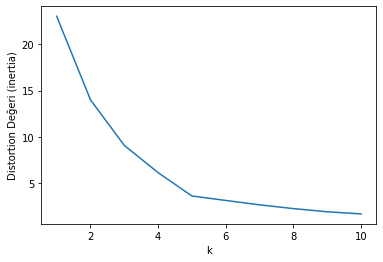

In [8]:
plt.xlabel('k')
plt.ylabel('Distortion Değeri (inertia)')
plt.plot(k_range,list_dist)
plt.show()

### K = 5 

In [9]:
kmeans_model = KMeans(n_clusters=5)
y_predicted = kmeans_model.fit_predict(df[['income','score']])
y_predicted

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1,
       2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

In [10]:
df['cluster'] = y_predicted
df.head()

,CustomerID,income,score,cluster
0,1,0.000000,0.387755,2
1,2,0.000000,0.816327,4
2,3,0.008197,0.051020,2
3,4,0.008197,0.775510,4
4,5,0.016393,0.397959,2


In [11]:
# Centroid

kmeans_model.cluster_centers_

array([[0.58638083, 0.82783883],
       [0.33029751, 0.49508692],
       [0.09265859, 0.20319432],
       [0.6       , 0.16443149],
       [0.08792846, 0.79962894]])

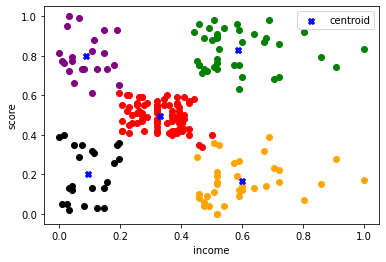

In [12]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]

plt.xlabel('income')
plt.ylabel('score')

plt.scatter(df1['income'],df1['score'],color='green')
plt.scatter(df2['income'],df2['score'],color='red')
plt.scatter(df3['income'],df3['score'],color='black')
plt.scatter(df4['income'],df4['score'],color='orange')
plt.scatter(df5['income'],df5['score'],color='purple')

plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1],color='blue', marker='X', label='centroid')
plt.legend()
plt.show()